### Import

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

### Data import & check

In [254]:
df = pd.read_csv('../ML_data/AirQualityUCI.csv', sep=';')

In [255]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [256]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [257]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [258]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

### Data Cleaning

In [260]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [261]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df = df.dropna()

In [263]:
print(df.head(5))

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

In [264]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.', regex=False)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/4046516063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.', regex=False)


In [265]:
df['CO(GT)'].unique()

array(['2.6', '2', '2.2', '1.6', '1.2', '1', '0.9', '0.6', '-200', '0.7',
       '1.1', '1.7', '1.5', '1.9', '2.9', '4.8', '6.9', '6.1', '3.9',
       '1.4', '0.8', '4.4', '3.1', '2.7', '2.1', '2.5', '2.8', '2.4',
       '3.7', '6.6', '3.5', '5.4', '3.2', '4.1', '3.6', '2.3', '4.2',
       '1.8', '3', '4.6', '5.9', '3.4', '5.5', '8.1', '5.8', '8', '6.5',
       '1.3', '5.3', '3.3', '4', '3.8', '5.1', '0.5', '4.3', '5', '7.6',
       '6.7', '5.7', '4.7', '4.5', '6.2', '0.4', '0.3', '5.2', '4.9',
       '6.3', '7.3', '6.4', '6', '5.6', '7.2', '0.2', '0.1', '7.5', '7',
       '7.7', '6.8', '8.4', '7.9', '9.5', '9.2', '8.7', '7.8', '10.2',
       '8.3', '8.6', '11.9', '11.5', '10.1', '9.4', '9.9', '7.4', '9.3',
       '9.1', '8.5', '1.0', '3.0', '5.0', '2.0', '-200.0', '4.0', '6.0',
       '7.1'], dtype=object)

In [266]:
df['CO(GT)'] = df['CO(GT)'].astype(float)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/872149503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO(GT)'] = df['CO(GT)'].astype(float)


In [267]:
df['CO(GT)']

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64

In [268]:
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.', regex=False)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/3871941549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.', regex=False)


In [269]:
df['C6H6(GT)'] = df['C6H6(GT)'].astype(float)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/2087629529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C6H6(GT)'] = df['C6H6(GT)'].astype(float)


In [270]:
df['T'] = df['T'].str.replace(',', '.', regex=False)
df['T'] = df['T'].astype(float)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/3923140100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T'] = df['T'].str.replace(',', '.', regex=False)
/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/3923140100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T'] = df['T'].astype(float)


In [271]:
df['RH'] = df['RH'].str.replace(',', '.', regex=False)
df['RH'] = df['RH'].astype(float)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/514028225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RH'] = df['RH'].str.replace(',', '.', regex=False)
/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/514028225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RH'] = df['RH'].astype(float)


In [272]:
df['AH'] = df['AH'].str.replace(',', '.', regex=False)
df['AH'] = df['AH'].astype(float)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/2332392243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AH'] = df['AH'].str.replace(',', '.', regex=False)
/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/2332392243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AH'] = df['AH'].astype(float)


In [273]:
df['AH']

0       0.7578
1       0.7255
2       0.7502
3       0.7867
4       0.7888
         ...  
9352    0.7568
9353    0.7119
9354    0.6406
9355    0.5139
9356    0.5028
Name: AH, Length: 9357, dtype: float64

In [274]:
df['Date'] = df['Date'].astype(str)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/3103013809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].astype(str)


In [275]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/3025020454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [276]:
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/1752450206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].str.replace('.', ':', regex=False)


In [277]:
print(df.head(5))

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

### Exploratory data analysis

In [339]:
print(df.describe())

                                Date      CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                            827  827.000000   827.000000   827.000000   
mean   2004-04-04 02:50:38.452237056    2.353567  1207.879081   231.025393   
min              2004-03-10 00:00:00    0.300000   753.000000     7.000000   
25%              2004-03-24 00:00:00    1.300000  1017.000000    77.000000   
50%              2004-04-02 00:00:00    2.000000  1172.000000   157.000000   
75%              2004-04-15 00:00:00    3.100000  1380.000000   318.500000   
max              2004-05-01 00:00:00    8.100000  2040.000000  1189.000000   
std                              NaN    1.409496   241.816997   208.461912   

         C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)     NO2(GT)  \
count  827.000000     827.000000  827.000000    827.000000  827.000000   
mean    10.771100     966.116082  143.501814    963.297461  100.259976   
min      0.500000     448.000000   12.000000    461.000000   19.000000   
2

#### Replace all -200

In [333]:
df.replace(-200, np.nan, inplace=True)
df.replace(-200.0, np.nan, inplace=True)

/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/505316318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-200, np.nan, inplace=True)
/var/folders/4n/x5n_qgr976s4g1xy7nlhrbg00000gn/T/ipykernel_32245/505316318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-200.0, np.nan, inplace=True)


In [335]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [337]:
df = df.dropna()

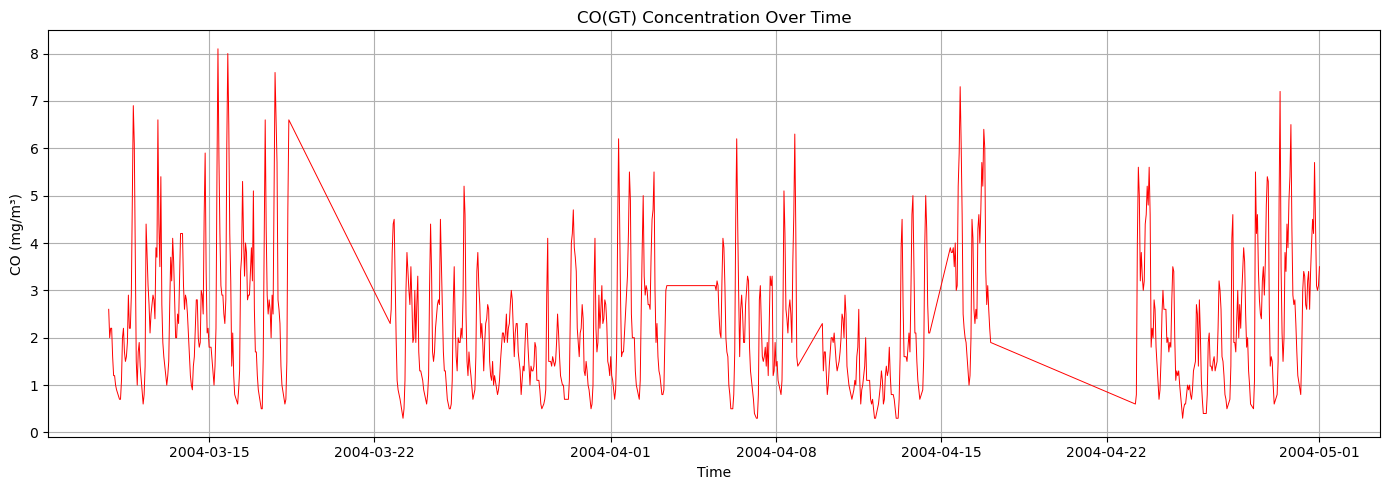

In [343]:
import matplotlib.pyplot as plt

# Combine Date and Time into a full datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Sort by datetime just in case
df = df.sort_values('datetime')

# Plot
plt.figure(figsize=(14, 5))
plt.plot(df['datetime'], df['CO(GT)'], color='red', linewidth=0.7)
plt.title("CO(GT) Concentration Over Time")
plt.xlabel("Time")
plt.ylabel("CO (mg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### We can notice that there is very clear fluctuation in CO(GT). They will increase and then drop.
#### Most data points are between 0 and 6.

In [350]:
new_df = df.drop(['Date', 'Time'], axis=1)

In [352]:
correlation_matrix = new_df.corr()

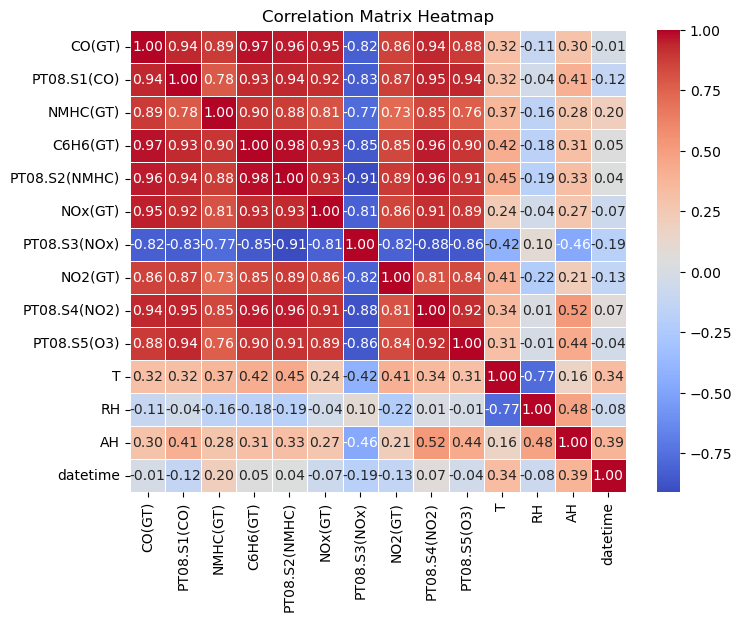

In [355]:
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### CO(GT) has strong correlation with PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3).
#### CO(GT) has relative low correlation with environment features, e.g T, RH, AH.

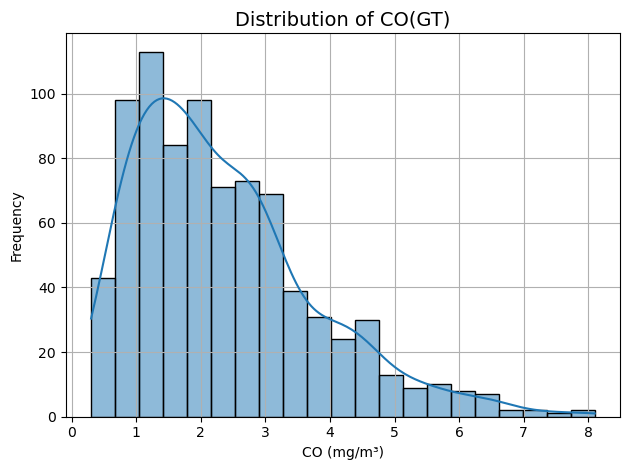

In [367]:
sns.histplot(df['CO(GT)'], kde=True)
plt.title("Distribution of CO(GT)", fontsize=14)
plt.xlabel("CO (mg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

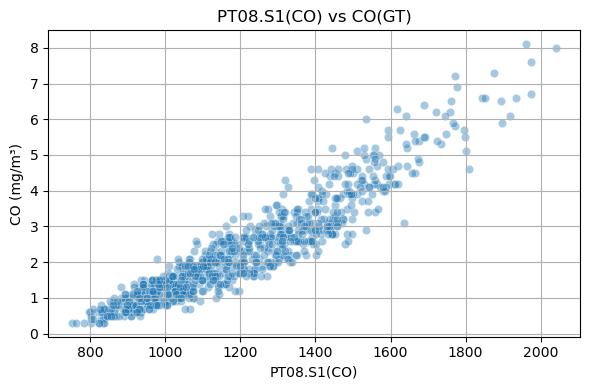

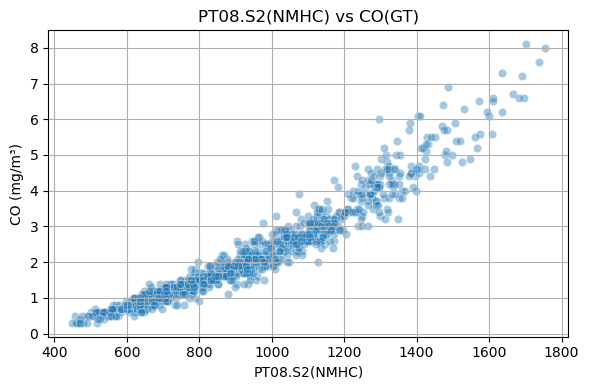

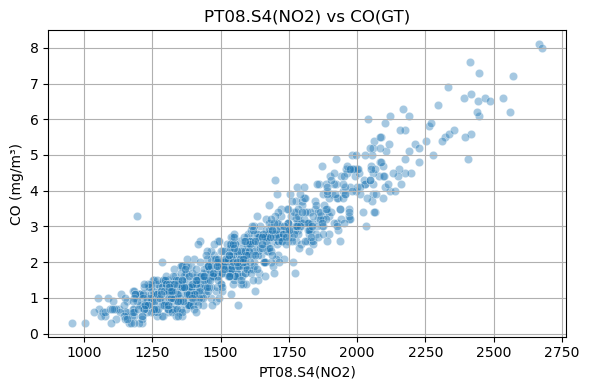

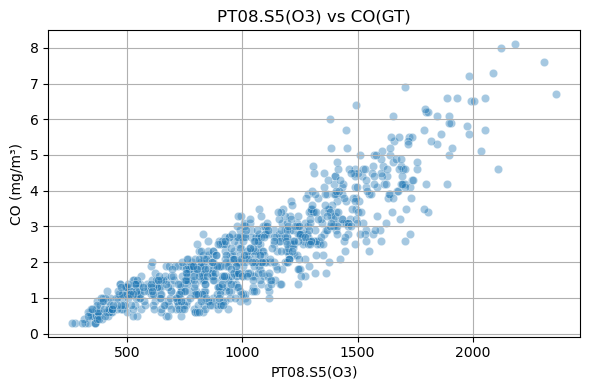

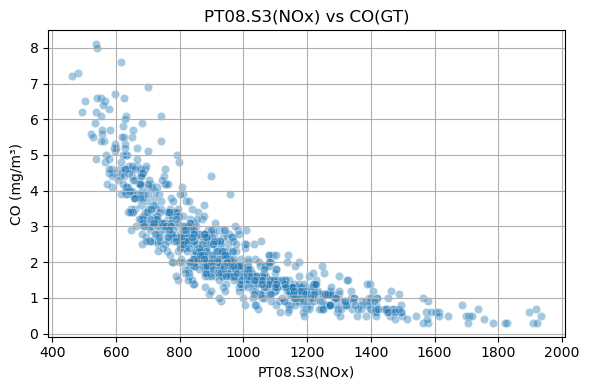

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

sensor_cols = [
    'PT08.S1(CO)',
    'PT08.S2(NMHC)',
    'PT08.S4(NO2)',
    'PT08.S5(O3)',
    'PT08.S3(NOx)'
]

for col in sensor_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['CO(GT)'], alpha=0.4)
    plt.title(f"{col} vs CO(GT)")
    plt.xlabel(col)
    plt.ylabel("CO (mg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Lower value of sensor PT08.S3(NOx) shows higher CO(GT)

### Model

In [374]:
features = [
    'PT08.S1(CO)',
    'PT08.S2(NMHC)',
    'PT08.S3(NOx)',
    'PT08.S4(NO2)',
    'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

X = df[features]
y = df['CO(GT)']

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [387]:
y_pred = model.predict(X_test)

In [393]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08272634021346736
R-squared: 0.9602591786889316


In [395]:
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (slope): 0.0012396208377299547
Intercept: -4.775085345140499


#### Our Mean Squared Error is 0.082, which is pretty small.
#### R square value is 0.96, which means the model explains 96% of the variance in CO concentrations.

In [408]:
pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

AH               0.656767
PT08.S2(NMHC)    0.005158
PT08.S3(NOx)     0.001277
PT08.S1(CO)      0.001240
PT08.S4(NO2)     0.000580
PT08.S5(O3)     -0.000257
RH              -0.014207
T               -0.069778
dtype: float64

#### Based on coefficient of each feature, we found that AH has strongest predictive effect. When other features stay same, every unit increase in AH, the CO will increase by 0.66 mg/m³.

### Random-Forest

In [412]:
from sklearn.ensemble import RandomForestRegressor

In [416]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest RMSE: 0.2729
Random Forest R²: 0.9642


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### The RMSE is 0.2729, which is smaller than RMSE of linear regression.
#### R-square is 0.9642, which is better than R-square of linear regression.
#### Random forest outperformed linear regression.

### Feature importance

In [428]:
importances = model.feature_importances_
feature_names = X.columns

In [430]:
feat_imp = pd.Series(importances, index=feature_names).sort_values()

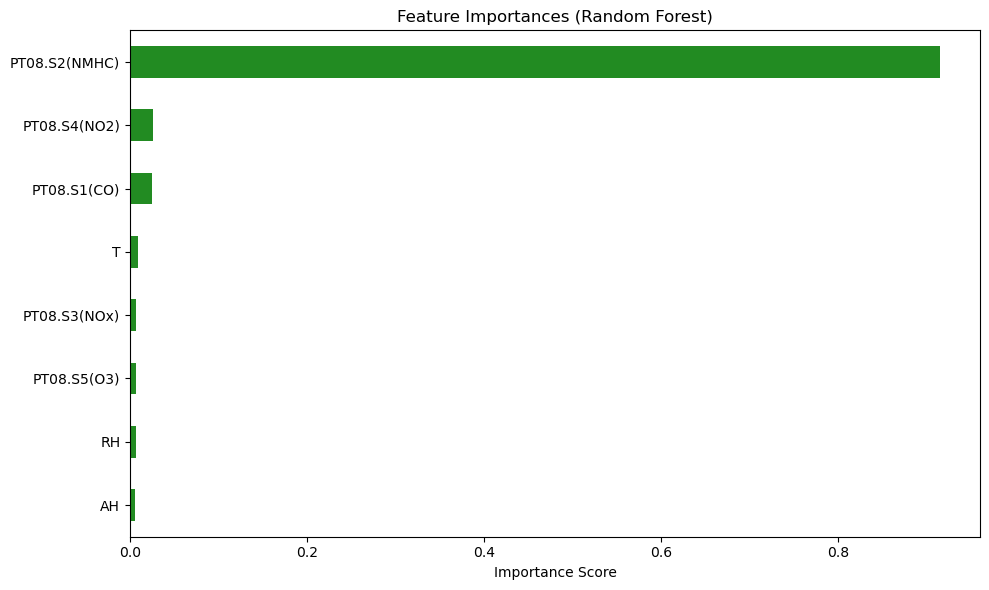

In [439]:
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', color='forestgreen')
plt.title('Feature Importances (Random Forest)')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


#### From the visualization, we can tell that PT08.S2(NMHC) is the most important feature, which also has highest correlation coefficient.

### Re-train model with less features

In [451]:
new_features = ['PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S1(CO)']
new_X = df[new_features]

In [453]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [455]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest RMSE: 0.2993
Random Forest R²: 0.9570


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Tune hyperparameter

In [466]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],  # ❌ removed 'auto'
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE (CV): 0.3374573478133182


In [468]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=5, random_state=42)

In [470]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_best = best_rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_best, squared=False)
r2 = r2_score(y_test, y_pred_best)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Test RMSE: 0.3098
Test R²: 0.9539


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
